In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import arch 
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
!pip install yfinance

In [236]:
!pip install arch


   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/924.9 kB 435.7 kB/s eta 0:00:03
   ----- ---------------------------------- 122.9/924.9 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 409.6/924.9 kB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 768.0/924.9 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------  921.6/924.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 924.9/924.9 kB 3.7 MB/s eta 0:00:00


In [2]:
# Download stock price data for period of 01.01.2020 to 23.07.2024
data = yf.download('JPM', start='2020-01-01', end='2024-07-23')

[*********************100%***********************]  1 of 1 completed


In [38]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM,JPM
Date,,,,,,
2020-01-02 00:00:00+00:00,122.852844,141.089996,141.100006,139.259995,139.789993,10803700
2020-01-03 00:00:00+00:00,121.231667,138.339996,139.229996,137.080002,137.500000,10386800
2020-01-06 00:00:00+00:00,121.135254,138.229996,138.270004,136.500000,136.559998,10259000
2020-01-07 00:00:00+00:00,119.075897,135.880005,137.860001,135.820007,137.279999,10531300
2020-01-08 00:00:00+00:00,120.004799,136.940002,137.580002,135.600006,135.699997,9695300


In [39]:
data.shape

(1145, 6)

In [40]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1145 entries, 2020-01-02 00:00:00+00:00 to 2024-07-22 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, JPM)  1145 non-null   float64
 1   (Close, JPM)      1145 non-null   float64
 2   (High, JPM)       1145 non-null   float64
 3   (Low, JPM)        1145 non-null   float64
 4   (Open, JPM)       1145 non-null   float64
 5   (Volume, JPM)     1145 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.6 KB


In [41]:
df.shape

(1145, 6)

In [42]:
#Remove ticker col name
df.columns = [col[0] for col in df.columns]

# #fix column names
# df.columns = [c.replace(" ", "_") for c in df.columns]
# #drop ticker symbol


In [43]:
df.columns = [c.replace(" ", "_") for c in df.columns]
df.head()

,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,122.852844,141.089996,141.100006,139.259995,139.789993,10803700
2020-01-03 00:00:00+00:00,121.231667,138.339996,139.229996,137.080002,137.500000,10386800
2020-01-06 00:00:00+00:00,121.135254,138.229996,138.270004,136.500000,136.559998,10259000
2020-01-07 00:00:00+00:00,119.075897,135.880005,137.860001,135.820007,137.279999,10531300
2020-01-08 00:00:00+00:00,120.004799,136.940002,137.580002,135.600006,135.699997,9695300


<Axes: xlabel='Date'>

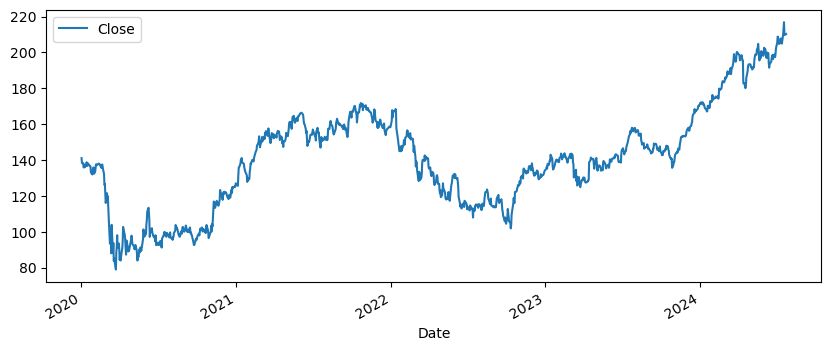

In [44]:
df['Close'].plot(legend=True,figsize=(10,4))


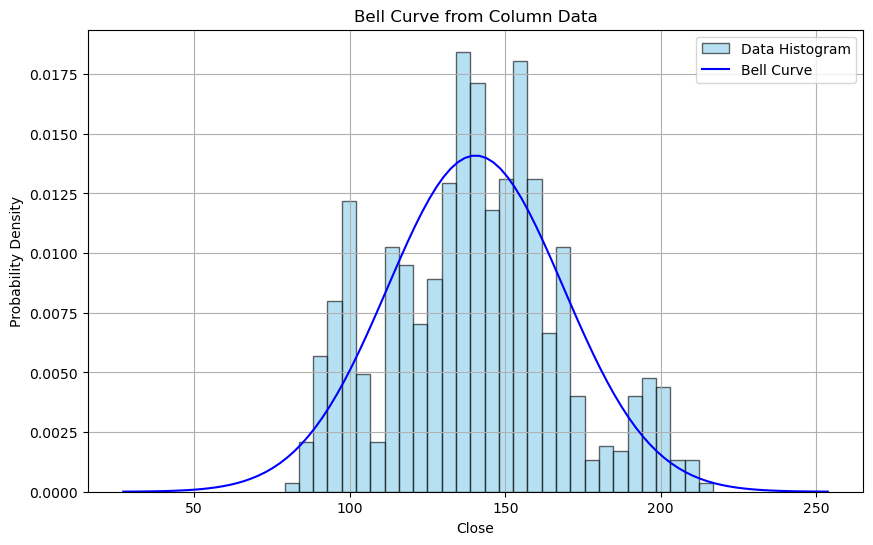

In [45]:
from scipy.stats import norm

mean = df['Close'].mean()
std_dev = df['Close'].std()

# Generate x values around the mean
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

# Calculate the probability density function (PDF) for the bell curve
y = norm.pdf(x, mean, std_dev)

# Plot histogram and the bell curve
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data Histogram')
plt.plot(x, y, color='blue', label='Bell Curve')

plt.title('Bell Curve from Column Data')
plt.xlabel('Close')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### 1.1. 

In [46]:
#1.1. 
#df['Close']=np.log( df['Close'])
df['Log Returns'] = np.log(df['Close']).diff()
# Remove missing values
df = df.dropna()

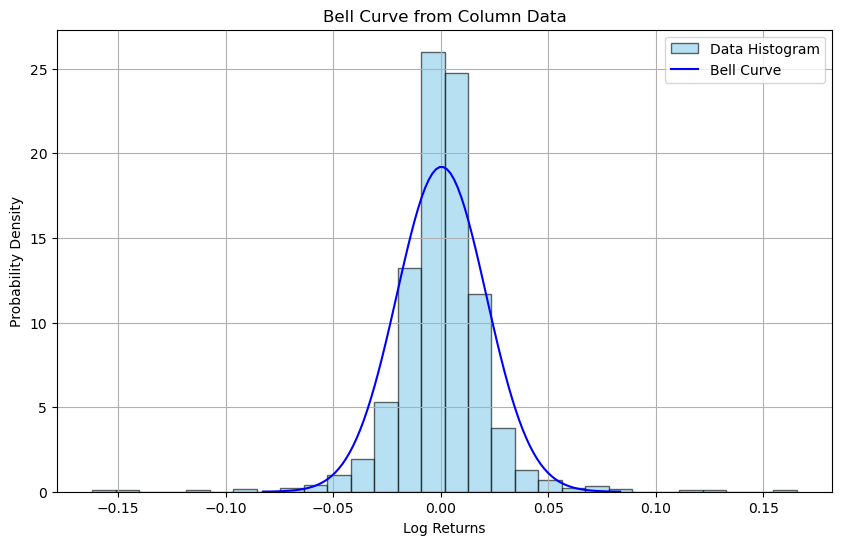

In [47]:
mean = df['Log Returns'].mean()
std_dev = df['Log Returns'].std()

# Generate x values around the mean
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

#probability density function (PDF) 
y = norm.pdf(x, mean, std_dev)

# Plot the histogram of the data and the bell curve
plt.figure(figsize=(10, 6))
plt.hist(df['Log Returns'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data Histogram')
plt.plot(x, y, color='blue', label='Bell Curve')

plt.title('Bell Curve from Column Data')
plt.xlabel('Log Returns')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### 1.2.

In [48]:
#print(df.index)
df.isna().sum()


Adj_Close      0
Close          0
High           0
Low            0
Open           0
Volume         0
Log Returns    0
dtype: int64

In [49]:
df.index.dtype

datetime64[ns, UTC]

In [50]:
df.index = pd.to_datetime(df.index)

In [51]:
df.index.dtype

datetime64[ns, UTC]

### 1.3. 

### A state space model is a mathematical framework used to model dynamic systems where the system's state evolves over time.

In [428]:
x(t) is the state vector at time t
F(t) is the state transition matrix
x(t−1) is the state vector at time t−1
G(t) is the control matrix
u(t) is the control vector

1144


# Question 2

### 2.1

##### build the state space model for predicting stock prices.We will use a simple model with a constant drift and a random walk for the volatility.

In [52]:
# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.001]])

# Define the observation noise covariance
R = np.array([[0.01]])

# Define the initial state
x0 = np.array([0])

# Define the number of time steps
T = len(df)

# Generate the observations
y = df['Log Returns'].values.reshape(-1, 1)

#### Estimating the States using the Kalman Filter

In [53]:
# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

### 2.2

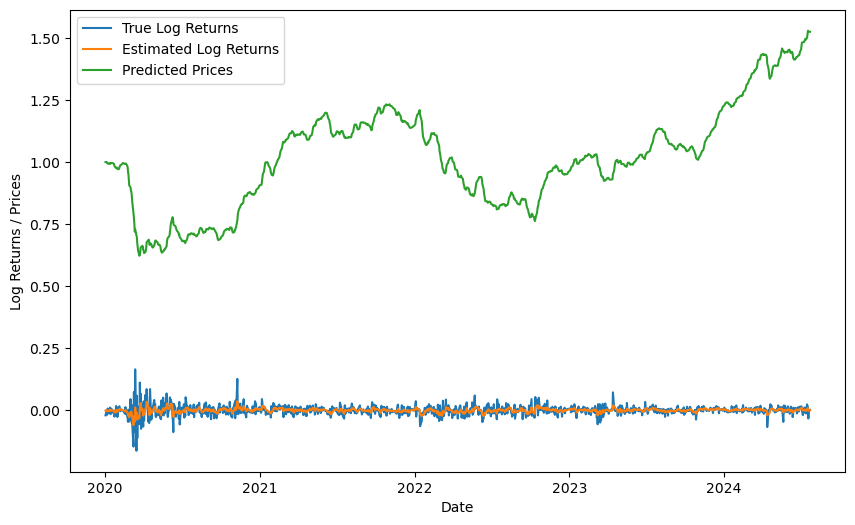

In [54]:
# Compute the estimated log returns
log_returns_hat = x_hat.flatten()

# Compute the predicted stock prices
prices_hat = np.exp(np.cumsum(log_returns_hat))

# Plot the true log returns, estimated log returns and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Log Returns'], label='True Log Returns')
plt.plot(df.index, log_returns_hat, label='Estimated Log Returns')
plt.plot(df.index, prices_hat, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns / Prices')
plt.legend()
plt.show()

# Question 3

### 3.1

In [55]:
#Random walk is define as a process where the current value of a variable is composed of 
#the past value plus an error term defined as a white noise(zero mean and variance of one)
#The is no pattern

#To test random walk it must be stationary and there must be no autocorrelation 

In [56]:
#use Augmented Dickey-Fuller (ADF) test to test for stationarity
#if p-value <0.05 series is stationary

result = adfuller(df['Adj_Close'])
print("ASD Statistic: ", result[0])
print("P-value: ", result[1])

ASD Statistic:  0.18475766892315806
P-value:  0.9713936230746674


In [57]:
#It is a random walk

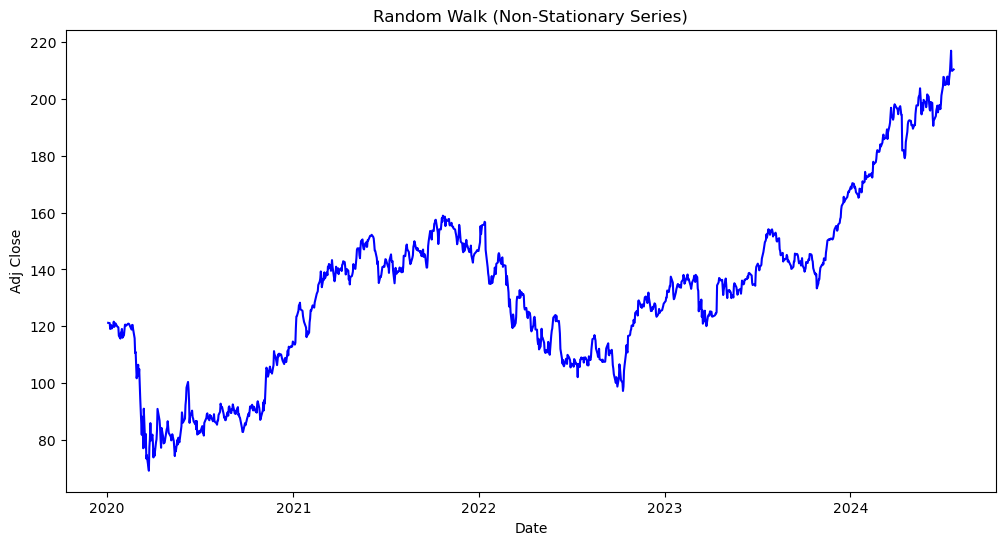

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df['Adj_Close'], color='blue')
plt.title("Random Walk (Non-Stationary Series)")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

In [59]:
#detrend
df['Adj_Close_Detrended'] = df['Adj_Close'].pct_change()
df.dropna(inplace=True)

In [60]:
# #moving average detrending
# df['mov_avg'] =  df['Adj_Close'].rolling(window=3).mean()
# df['Adj_Close_Detrended'] = df['Adj_Close'] - df['mov_avg']
# df.dropna(inplace=True)

In [61]:
 df['Adj_Close_Detrended'].shape

(1143,)

### 3.2 

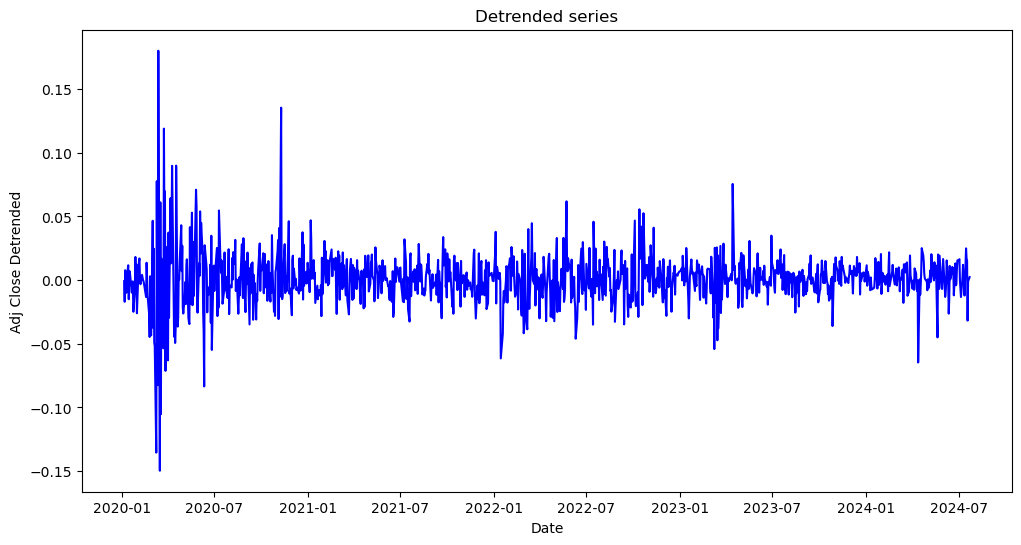

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df['Adj_Close_Detrended'], color='blue')
plt.title("Detrended series")
plt.xlabel("Date")
plt.ylabel("Adj Close Detrended")
plt.show()

In [63]:
result = adfuller(df['Adj_Close_Detrended'])
print("ASD Statistic: ", result[0])
print("P-value: ", result[1])

ASD Statistic:  -9.89448817012451
P-value:  3.487126698883316e-17


In [64]:
#The series is not stationary
#The volatility of the stock is highest in the beginning of the year .The stock price has a higher fluctuation 

### 3.3

In [65]:
#ARCH (Autoregressive Conditional Heteroskedasticity)
#If the squared residuals/errors of your time series model exhibit autocorrelation, then ARCH effects are present.

In [66]:
#In the code below, we fit a GARCH model to the data, and then we obtain the squared residuals of the model to test if there are or not heteroskedasticity in the data.
#If the p-value is below 0.05, it means that the ARCH effect is present in the data

In [67]:
# Fit an ARCH model to the data
model = arch.arch_model(df['Adj_Close_Detrended'], vol = 'GARCH', p = 1, q = 1, rescale = False)
fit_model = model.fit()
residuals = fit_model.resid
squared_residuals = residuals**2

arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.7921337796589007e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 37041137.03365043
Iteration:      3,   Func. Count:     31,   Neg. LLF: 44878041056493.84
Iteration:      4,   Func. Count:     42,   Neg. LLF: 11530543.45141454
Iteration:      5,   Func. Count:     55,   Neg. LLF: 127628642.00389461
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3057.821941434313
            Iterations: 6
            Function evaluations: 65
            Gradient evaluations: 5
ARCH test results:

LM Statistic: 260.30257346437173
p-value: 3.690169881215813e-50
F Statistic: 33.46629410681569
p-value: 3.022270088691422e-57


In [68]:
#The ARCH effect is visible in the data(exhibit volatility clustering)

### ARCH(1)

In [69]:
#Error Term Variance - A smaller error variance suggests that the model closely fits the data, 
#as the residuals (differences between predicted and actual values) are small on average

In [70]:
#obtain the summary of it to see the coefficients and how well the model fits the data.

In [71]:
model = arch.arch_model(df['Adj_Close_Detrended'],
                       vol = 'ARCH',
                       p = 1, # One lag of the squared residuals
                       rescale = False)
results_arch1 = model.fit(disp = 'off', show_warning = False)
print(results_arch1.summary()) # Plotting summary

                       Constant Mean - ARCH Model Results                      
Dep. Variable:     Adj_Close_Detrended   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        ARCH   Log-Likelihood:                2996.30
Distribution:                   Normal   AIC:                          -5986.60
Method:             Maximum Likelihood   BIC:                          -5971.47
                                         No. Observations:                 1143
Date:                 Sat, Nov 09 2024   Df Residuals:                     1142
Time:                         01:43:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6770e-03  6.103e-04      2.748  6.00

In [72]:
# The estimated coefficient for the mean is 1.6657e-03 and it's considered statistically significant 
#with a p-value below 0.05.

In [73]:
#These results give us statistical evidence that the ARCH(1) model is suitable for modelling the volatility of Adj_Close_Detrended   

### ARCH(2)

In [74]:
model = arch.arch_model(df['Adj_Close_Detrended'],
                       vol = 'ARCH',
                       p = 2, # Two lags of the squared residuals
                       rescale = False)
results_arch2 = model.fit(disp = 'off', show_warning = False)
print(results_arch2.summary())

                       Constant Mean - ARCH Model Results                      
Dep. Variable:     Adj_Close_Detrended   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        ARCH   Log-Likelihood:                3025.62
Distribution:                   Normal   AIC:                          -6043.24
Method:             Maximum Likelihood   BIC:                          -6023.07
                                         No. Observations:                 1143
Date:                 Sat, Nov 09 2024   Df Residuals:                     1142
Time:                         01:43:57   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.4973e-03  4.872e-04      3.073  2.11

In [75]:
#The estimated coefficient for the mean is 1.4861e-03 and it's considered 
#statistically significant with a p-value below 0.05.
#All parameters are statistically significant with their p-values below the threshold of 0.05.

In [76]:
#These results give us statistical evidence that the ARCH(2) model is also suitable for 
#modelling the volatility of Adj_Close_Detrended   

# Question 4

### 4.1

### GARCH(1,1)

In [77]:
# Rescaling data by multiplying it for 100
#to avoid DataScaleWarning
df['Adj_Close_Detrended']=df['Adj_Close_Detrended'] *100

model = arch.arch_model(df['Adj_Close_Detrended'],
                       vol = 'GARCH', 
                       p = 1,
                       q = 1)
results_grach = model.fit(disp = 'off', show_warning = False)
print(results_grach.summary())

                      Constant Mean - GARCH Model Results                      
Dep. Variable:     Adj_Close_Detrended   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:               -2205.39
Distribution:                   Normal   AIC:                           4418.77
Method:             Maximum Likelihood   BIC:                           4438.94
                                         No. Observations:                 1143
Date:                 Sat, Nov 09 2024   Df Residuals:                     1142
Time:                         01:44:03   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1187  4.466e-02      2.659  7.843e-03 

In [78]:
#The estimated coefficient for the mean is 0.1177 and it's also considered 
#statistically significant with a p-value below 0.05.

### 4.2

### Ljung-Box Q-test for residual autocorrelation


##### Detecting Autocorrelation-The Ljung-Box test examines whether any lagged values of a time series (up to a certain lag) are correlated with each other. (it tests if the residuals from a model are "white noise," implying they are random and have no predictable structure.)
#### NB white noise has a mean of 0

##### Checking Model Adequacy- If the residuals from a fitted model are not autocorrelated (i.e., they are white noise), it suggests that the model has captured all significant patterns in the data.

##### A high p-value in the test indicates no significant autocorrelation in the residuals, meaning the model is adequate.
##### A low p-value suggests the presence of autocorrelation, indicating the model may not have captured all patterns, and a better model may be needed

#### ARCH(1)

In [79]:
ljung_box_test = acorr_ljungbox(results_arch1.resid, lags=[10], return_df=True) 

print("\nLjung-Box Test ARCH(1) Results:")

print(ljung_box_test)


Ljung-Box Test ARCH(1) Results:
      lb_stat     lb_pvalue
10  121.18942  2.902121e-21


In [80]:
# p value is 2.812241e-21. p-value < 0.05 Therefore there is a presence of autocorrelation in the residuals

#### ARCH(2)

In [81]:
ljung_box_test = acorr_ljungbox(results_arch2.resid, lags=[10], return_df=True) 

print("\nLjung-Box Test ARCH(2) Results:")

print(ljung_box_test)


Ljung-Box Test ARCH(2) Results:
      lb_stat     lb_pvalue
10  121.18942  2.902121e-21


#### GARCH(1,1)

In [82]:
ljung_box_test = acorr_ljungbox(results_grach.resid, lags=[10], return_df=True) 

print("\nLjung-Box Test GARCH(1,1) Results:")

print(ljung_box_test)


Ljung-Box Test GARCH(1,1) Results:
      lb_stat     lb_pvalue
10  121.18942  2.902121e-21


### Engle arch test

#### the Engle's ARCH test (Autoregressive Conditional Heteroskedasticity test) is a statistical test used to detect the presence of ARCH effects in a time series. ARCH effects indicate that the variance of the error terms (or residuals) changes over time, usually in clusters.  If ARCH effects are present, it suggests that a GARCH model (Generalized Autoregressive Conditional Heteroskedasticity) or an ARCH model might be more appropriate for modeling the volatility in the data.
#### In this case it will be used for the redsiduals

### ARCH(1)

In [83]:
engle_arch_test = sm.stats.acorr_lm(results_arch1.resid, nlags=2) 

print("\nEngle ARCH(1) Test Results:")

print(f"LM Statistic: {engle_arch_test[0]}")

print(f"p-value: {engle_arch_test[1]}") 


Engle ARCH(1) Test Results:
LM Statistic: 30.531692274458766
p-value: 2.3449158437530913e-07


#### ARCH(2)

In [84]:
engle_arch_test = sm.stats.acorr_lm(results_arch2.resid, nlags=2) 

print("\nEngle ARCH(2) Test Results:")

print(f"LM Statistic: {engle_arch_test[0]}")

print(f"p-value: {engle_arch_test[1]}") 


Engle ARCH(2) Test Results:
LM Statistic: 30.531692274458894
p-value: 2.3449158437529442e-07


#### GARCH(1,1)

In [85]:
engle_arch_test = sm.stats.acorr_lm(results_grach.resid, nlags=2) 

print("\nEngle GARCH(1,1)) Test Results:")

print(f"LM Statistic: {engle_arch_test[0]}")

print(f"p-value: {engle_arch_test[1]}") 


Engle GARCH(1,1)) Test Results:
LM Statistic: 30.531692274458642
p-value: 2.344915843753239e-07


In [86]:
#  The null hypothesis is rejected accepted. p-value < 0.05 therefore there are  ARCH effect in the residuals for all the models

### 4.3

#### Plotting Conditional Volatility

#### Conditional volatility is a component of the Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) model, a statistical technique used to predict the volatility of financial assets. The GARCH model is an extension of the ARCH model that allows for more flexibility in modeling conditional volatility. It's particularly useful for high-frequency financial and economic time series.

### ARCH(1)

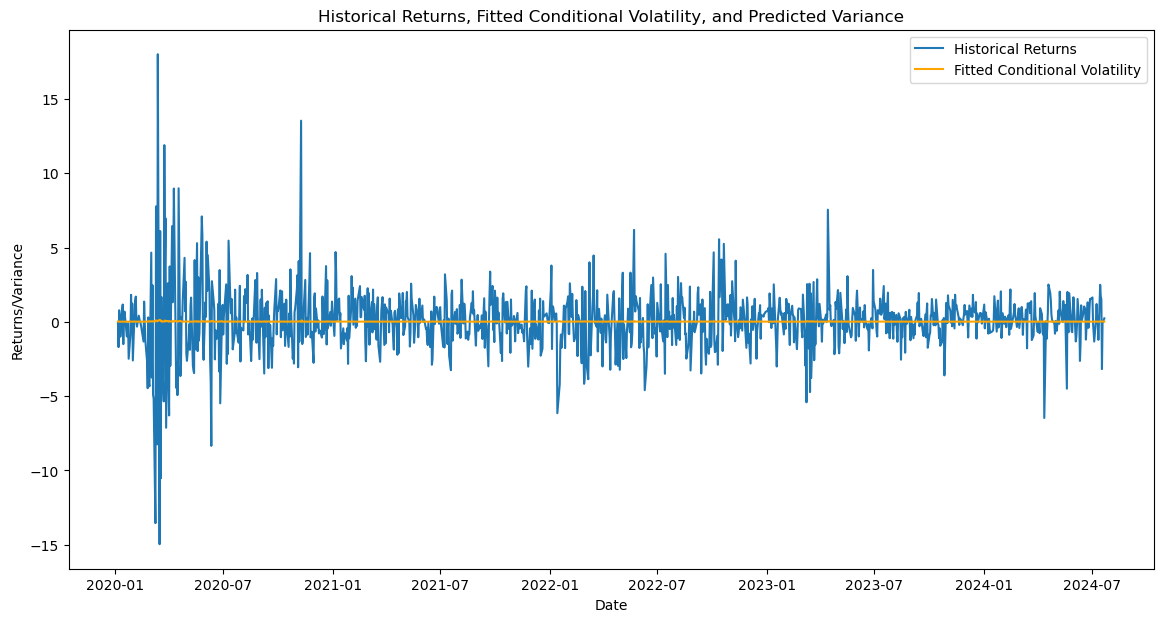

In [87]:
conditional_volatility = results_arch1.conditional_volatility  # Fitted model's volatility

 

# Plotting

plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Adj_Close_Detrended'], label='Historical Returns') 

plt.plot(df.index[-len(conditional_volatility):], conditional_volatility, label='Fitted Conditional Volatility', color='orange')

plt.legend()

plt.title('Historical Returns, Fitted Conditional Volatility, and Predicted Variance')

plt.xlabel('Date')

plt.ylabel('Returns/Variance')

plt.show()

### ARCH(2)

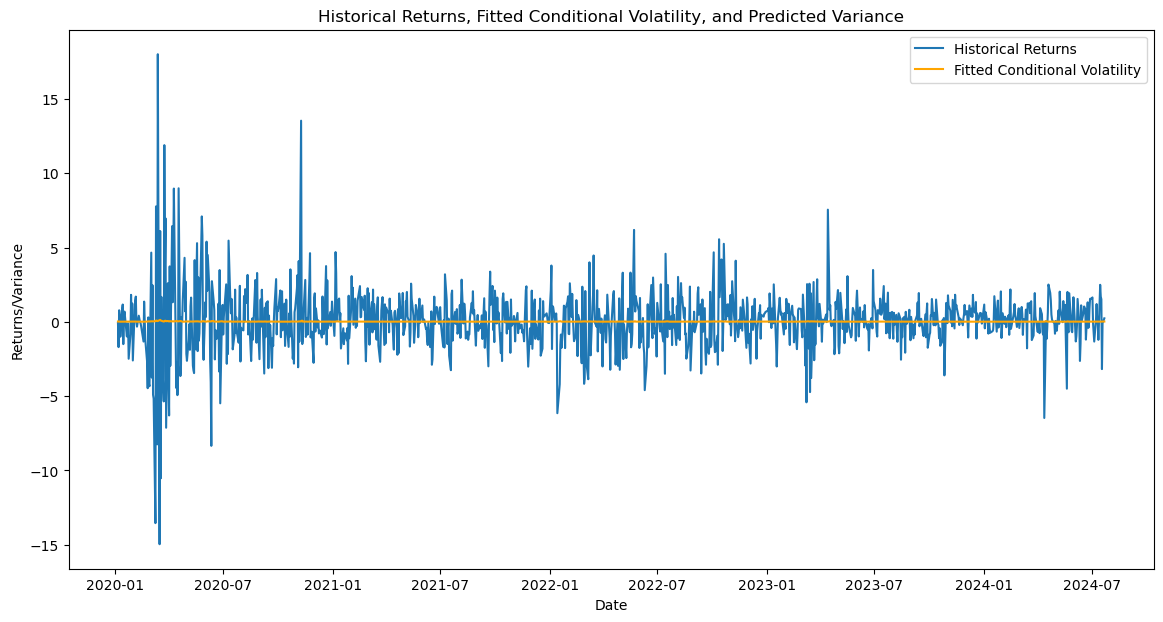

In [88]:
conditional_volatility = results_arch2.conditional_volatility  # Fitted model's volatility

 

# Plotting

plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Adj_Close_Detrended'], label='Historical Returns') 

plt.plot(df.index[-len(conditional_volatility):], conditional_volatility, label='Fitted Conditional Volatility', color='orange')

plt.legend()

plt.title('Historical Returns, Fitted Conditional Volatility, and Predicted Variance')

plt.xlabel('Date')

plt.ylabel('Returns/Variance')

plt.show()

### GARCH(1,1)

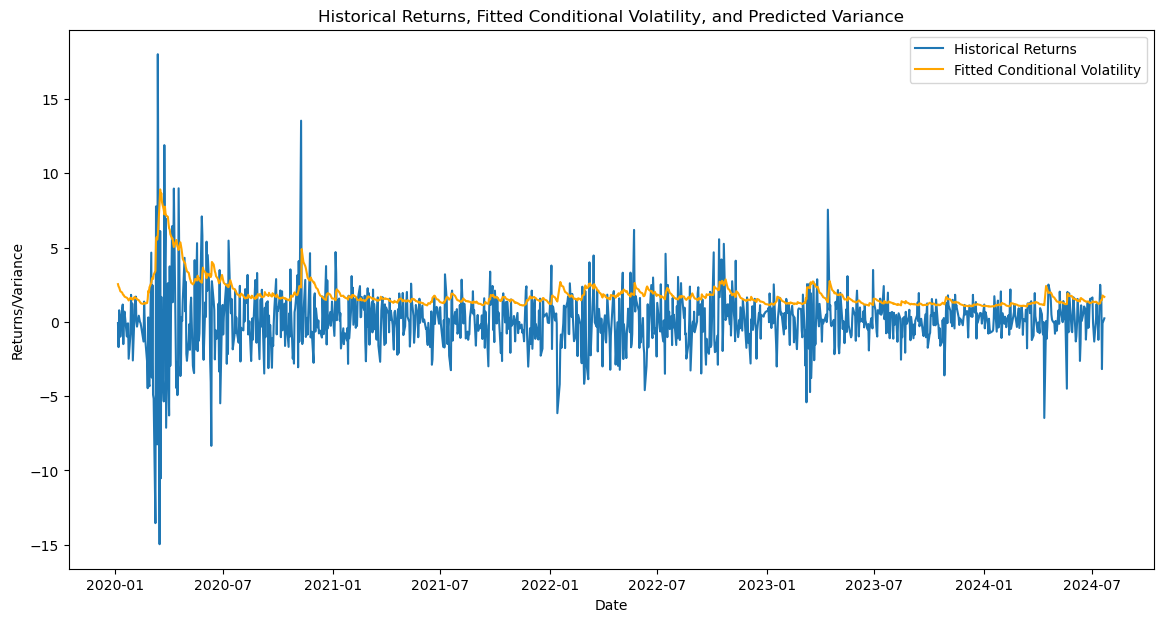

In [89]:
conditional_volatility = results_grach.conditional_volatility  # Fitted model's volatility

 

# Plotting

plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Adj_Close_Detrended'], label='Historical Returns') 

plt.plot(df.index[-len(conditional_volatility):], conditional_volatility, label='Fitted Conditional Volatility', color='orange')

plt.legend()

plt.title('Historical Returns, Fitted Conditional Volatility, and Predicted Variance')

plt.xlabel('Date')

plt.ylabel('Returns/Variance')

plt.show()

### 4.4

#### To decide which of the three models above are the best fit to the data, we must look at the AIC and the BIC values.
#### The AIC (Akaike information criterion) estimates the amount of information lost by a model, and it's given by the following equation: 
### AIC =2k - 2ln(L) 
##### Where k represents the number of parameters in the model, and L is the maximum likelihood estimate of the likelihood function for the model.

#### Considering that the AIC estimates the amount of information lost, we can conclude 
### the lower its value, the better the model is.

#### The BIC (Bayesian information criterion) is similar to the AIC, but has a different penalty term. The equation for the BIC is as follows: 
### BIC = kln(n) -2ln(L)
#### Where L is the maximum likelihood function of the model, k is the number of parameters, and n is the sample size. Once again, 
### the model with the lowest BIC value is preferred.

In [ ]:
#The ARCH(2) model performs best with this data. It has an AIC of -6048.70 and a BIC of -6028.53 which are the lowest among the models.
#This emplies that this model has the lowest information lost and fits the data better compared to the other models.